In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [61]:
allCompanies = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "PYPL", "TSLA", "GLNCY", "BHP", "RIO", "VALE", "CSUAY", "NGLOY", "ZIJMF", "WMT", "COST", "HD", "JD", "KR",  "WBA", "BABA", "TGT", "LOW", "LEN", "CAT", "CCS", "MTH", "TOL", "DHI", "KBH", "TM", "BYDDF", "VWAGY", "MBGYY", "STLA", "GM", "RACE", "F", "HMC"]
#with outliers removed

# techCompanies = ["AAPL","MSFT","AMZN","TSLA","NVDA", "PYPL"]
df = pd.read_csv(allCompanies[0]+".csv", index_col=0)
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df["Change"] = (df["Close"] - df["Open"]) / df["Open"] * 100
# df = pd.DataFrame()
df



,Close,Date,High,Low,Open,Volume,Change
0,152.59,"Mar 14, 2023",153.40,150.10,151.28,"73,628,400",0.865944
1,150.47,"Mar 13, 2023",153.14,147.70,147.81,"84,457,100",1.799608
2,148.50,"Mar 10, 2023",150.94,147.61,150.21,"68,524,400",-1.138406
3,150.59,"Mar 09, 2023",154.54,150.23,153.56,"53,833,600",-1.934097
4,152.87,"Mar 08, 2023",153.47,151.83,152.81,"47,204,800",0.039264
...,...,...,...,...,...,...,...
3289,9.34,"Apr 28, 2010",9.43,9.16,9.40,"758,402,400",-0.638298
3290,9.36,"Apr 27, 2010",9.57,9.30,9.55,"709,343,600",-1.989529
3291,9.63,"Apr 26, 2010",9.73,9.58,9.71,"479,068,800",-0.823893
3292,9.67,"Apr 23, 2010",9.72,9.54,9.57,"796,955,600",1.044932


In [62]:
for i in range(1,len(allCompanies)):
  dfNew = pd.read_csv(allCompanies[i]+".csv", index_col=0)
  dfNew['Open'] = pd.to_numeric(dfNew['Open'], errors='coerce')
  dfNew["Change"] = (dfNew["Close"] - dfNew["Open"]) / dfNew["Open"] * 100
  df = df.merge(dfNew, on="Date", suffixes=["_"+allCompanies[i-1],"_"+allCompanies[i]])

In [63]:
# df["Change_TSLA"] = df["Change"]
df

,Close_AAPL,Date,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Change_AAPL,Close_AMZN,High_AMZN,Low_AMZN,...,Low_F,Open_F,Volume_F,Change_F,Close_HMC,High_HMC,Low_HMC,Open_HMC,Volume_HMC,Change_HMC
0,152.59,"Mar 14, 2023",153.40,150.10,151.28,"73,628,400",0.865944,94.88,95.07,92.71,...,11.77,12.21,"93,752,400",-2.293202,25.41,25.50,25.12,25.23,"1,279,100",0.713436
1,152.59,"Mar 14, 2023",153.40,150.10,151.28,"73,628,400",0.865944,94.88,95.07,92.71,...,11.77,12.21,"93,752,400",-2.293202,25.41,25.50,25.12,25.23,"1,279,100",0.713436
2,152.59,"Mar 14, 2023",153.40,150.10,151.28,"73,628,400",0.865944,94.88,95.07,92.71,...,11.77,12.21,"93,752,400",-2.293202,25.41,25.50,25.12,25.23,"1,279,100",0.713436
3,152.59,"Mar 14, 2023",153.40,150.10,151.28,"73,628,400",0.865944,94.88,95.07,92.71,...,11.77,12.21,"93,752,400",-2.293202,25.41,25.50,25.12,25.23,"1,279,100",0.713436
4,150.47,"Mar 13, 2023",153.14,147.70,147.81,"84,457,100",1.799608,92.43,94.02,88.12,...,11.32,11.93,"119,167,600",0.838223,25.72,25.91,25.63,25.74,"1,286,000",-0.077700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,47.04,"May 16, 2018",47.12,46.50,46.52,"76,732,400",1.117799,79.36,79.72,78.83,...,11.20,11.21,"28,976,700",1.694915,33.15,33.15,32.96,33.04,"284,100",0.332930
1727,46.61,"May 15, 2018",46.77,46.28,46.69,"94,780,800",-0.171343,78.81,79.39,78.26,...,11.06,11.10,"26,950,100",1.081081,32.85,33.06,32.79,33.04,"701,300",-0.575061
1728,46.61,"May 15, 2018",46.77,46.28,46.69,"94,780,800",-0.171343,78.81,79.39,78.26,...,11.06,11.10,"26,950,100",1.081081,32.85,33.06,32.79,33.04,"701,300",-0.575061
1729,47.04,"May 14, 2018",47.38,46.97,47.25,"83,115,200",-0.444444,80.08,80.56,80.00,...,11.17,11.23,"27,903,100",-0.445236,33.31,33.50,33.31,33.42,"490,400",-0.329144


In [64]:
columns = ["Change_"+a for a in allCompanies]
columns.append("Date")
dfPrices = df[columns]
# dfPrices = dfPrices.set_index(dfPrices["Date"])
dfPrices

,Change_AAPL,Change_AMZN,Change_GOOG,Change_META,Change_MSFT,Change_NVDA,Change_PYPL,Change_TSLA,Change_GLNCY,Change_BHP,...,Change_TM,Change_BYDDF,Change_VWAGY,Change_MBGYY,Change_STLA,Change_GM,Change_RACE,Change_F,Change_HMC,Date
0,0.865944,1.119045,1.267863,3.433202,1.573515,2.413177,-1.120562,3.355705,0.450045,0.859788,...,0.190602,0.396040,-0.823723,0.359527,0.228702,-2.358749,0.129494,-2.293202,0.713436,"Mar 14, 2023"
1,0.865944,1.119045,1.267863,3.433202,1.573515,2.413177,-1.120562,3.355705,0.450045,0.859788,...,0.190602,0.396040,-0.823723,0.359527,0.228702,-2.358749,0.129494,-2.293202,0.713436,"Mar 14, 2023"
2,0.865944,1.119045,1.267863,3.433202,1.573515,2.413177,-1.120562,3.355705,0.450045,0.859788,...,0.190602,0.396040,-0.823723,0.359527,0.228702,-2.358749,0.129494,-2.293202,0.713436,"Mar 14, 2023"
3,0.865944,1.119045,1.267863,3.433202,1.573515,2.413177,-1.120562,3.355705,0.450045,0.859788,...,0.190602,0.396040,-0.823723,0.359527,0.228702,-2.358749,0.129494,-2.293202,0.713436,"Mar 14, 2023"
4,1.799608,2.734245,1.203489,1.652057,2.635408,0.940577,-0.013770,4.192046,NaN,2.187816,...,NaN,NaN,NaN,NaN,0.405093,0.393038,NaN,0.838223,-0.077700,"Mar 13, 2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,1.117799,0.608519,0.408391,-0.272183,NaN,0.819672,0.412903,0.951374,0.952381,0.087203,...,0.306726,0.434783,-0.249128,0.304260,0.768883,2.867190,0.284730,1.694915,0.332930,"May 16, 2018"
1727,-0.171343,-0.730571,-0.990826,-0.302899,0.082271,-2.863924,-0.077071,-0.263158,0.492611,0.310697,...,-0.161243,-1.004304,0.348259,0.304260,0.000000,1.483516,-0.097000,1.081081,-0.575061,"May 15, 2018"
1728,-0.171343,-0.730571,-0.990826,-0.302899,0.082271,-2.863924,-0.077071,-0.263158,0.492611,0.310697,...,-0.161243,-1.004304,0.348259,0.304260,0.000000,1.483516,-0.097000,1.081081,-0.575061,"May 15, 2018"
1729,-0.444444,-0.149626,0.018182,-0.570028,0.112337,-0.281162,-0.416983,-3.758655,0.000000,0.462046,...,0.072443,1.015965,-0.347395,-0.100503,-0.265369,-1.160281,-0.110824,-0.445236,-0.329144,"May 14, 2018"


In [65]:
# pyplot.figure(figsize=(15,15))
# scatter_matrix(dfPrices ,figsize=(12,12))
# pyplot.show()

In [66]:
mktcaps = [2380, 947.15, 1170, 1890, 469.01, 567.26, 82.15, 546.73]

sumT = 0
for i in mktcaps:
  sumT+=i
for i in range(0,len(mktcaps)):
  mktcaps[i]/=sumT
mktcaps

[0.2955677259913317,
 0.11762477801373522,
 0.14530010059237736,
 0.2347155471107634,
 0.058245470238317006,
 0.07044695304447177,
 0.01020205407150752,
 0.06789737093749612]

In [67]:
dfPrices["tech"] = (mktcaps[0]* dfPrices["Change_AAPL"]) + (mktcaps[1]* dfPrices["Change_AMZN"]) + (mktcaps[2]* dfPrices["Change_GOOG"]) + (mktcaps[3]* dfPrices["Change_MSFT"]) + (mktcaps[4]* dfPrices["Change_META"]) + (mktcaps[5]* dfPrices["Change_NVDA"]) + (mktcaps[6]* dfPrices["Change_PYPL"]) + (mktcaps[7]* dfPrices["Change_TSLA"]) 

<ipython-input-67-3c4a176f1716>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPrices["tech"] = (mktcaps[0]* dfPrices["Change_AAPL"]) + (mktcaps[1]* dfPrices["Change_AMZN"]) + (mktcaps[2]* dfPrices["Change_GOOG"]) + (mktcaps[3]* dfPrices["Change_MSFT"]) + (mktcaps[4]* dfPrices["Change_META"]) + (mktcaps[5]* dfPrices["Change_NVDA"]) + (mktcaps[6]* dfPrices["Change_PYPL"]) + (mktcaps[7]* dfPrices["Change_TSLA"])


In [68]:
# dfPrices = dfPrices.drop("mining", axis=1).dropna()
dfPrices = dfPrices.dropna()
dfPrices

,Change_AAPL,Change_AMZN,Change_GOOG,Change_META,Change_MSFT,Change_NVDA,Change_PYPL,Change_TSLA,Change_GLNCY,Change_BHP,...,Change_BYDDF,Change_VWAGY,Change_MBGYY,Change_STLA,Change_GM,Change_RACE,Change_F,Change_HMC,Date,tech
0,0.865944,1.119045,1.267863,3.433202,1.573515,2.413177,-1.120562,3.355705,0.450045,0.859788,...,0.396040,-0.823723,0.359527,0.228702,-2.358749,0.129494,-2.293202,0.713436,"Mar 14, 2023",1.527502
5,-1.138406,-2.093450,-1.610811,-0.828683,-0.991716,-1.896706,-3.305241,-0.964997,-0.798580,-0.988305,...,-3.018868,-0.704607,-0.409207,-1.565996,-3.129973,-1.708244,-2.654867,-0.830816,"Mar 10, 2023",-1.330665
6,-1.934097,-1.526473,-1.936713,-2.500671,-1.368149,-3.056877,-1.338358,-4.066574,-0.889680,-1.619958,...,-0.546448,-0.745871,-0.660905,-1.480263,-4.301619,-1.294052,-4.377880,-1.382144,"Mar 09, 2023",-2.004502
8,0.039264,0.341880,0.264831,1.148357,-0.133837,2.954826,0.904737,-1.642888,1.148410,-0.031606,...,1.056082,-0.892388,0.101112,0.054054,0.151134,0.405853,1.564945,0.113122,"Mar 08, 2023",0.231613
10,-1.366298,-0.542207,-1.309998,-2.375661,-0.838861,-1.322034,-2.129605,-1.917651,-3.424658,-2.185535,...,-0.889047,-1.826722,-1.987084,-1.915913,-1.193436,-1.780361,-0.850077,-1.234568,"Mar 07, 2023",-1.238282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,-0.470085,-0.442646,0.433227,-0.441441,0.364545,-1.537230,1.113892,-2.792413,2.014099,-0.176173,...,0.898204,0.000000,-0.100959,-0.455373,-1.254246,-0.473115,-0.961538,-0.722456,"May 18, 2018",-0.354734
1723,-0.531915,0.075921,-0.111132,0.591198,-0.599421,0.666450,2.009532,-0.472193,0.754717,0.021825,...,-0.589102,-0.297767,0.453172,-0.045065,0.869107,0.134781,0.526316,0.000000,"May 17, 2018",-0.235303
1725,1.117799,0.608519,0.408391,-0.272183,-0.215694,0.819672,0.412903,0.951374,0.952381,0.087203,...,0.434783,-0.249128,0.304260,0.768883,2.867190,0.284730,1.694915,0.332930,"May 16, 2018",0.521373
1727,-0.171343,-0.730571,-0.990826,-0.302899,0.082271,-2.863924,-0.077071,-0.263158,0.492611,0.310697,...,-1.004304,0.348259,0.304260,0.000000,1.483516,-0.097000,1.081081,-0.575061,"May 15, 2018",-0.499285


In [69]:
train_df = pd.concat([dfPrices.iloc[:, -1].shift(1), dfPrices.iloc[:, :-1]], axis=1)
# train_df.loc[train_df["Change_AAPL"] > 0, "positive"] = 3
# train_df.loc[train_df["Change_AAPL"] <= 0, "positive"] = -3
train_df = train_df.dropna()
train_df

,tech,Change_AAPL,Change_AMZN,Change_GOOG,Change_META,Change_MSFT,Change_NVDA,Change_PYPL,Change_TSLA,Change_GLNCY,...,Change_TM,Change_BYDDF,Change_VWAGY,Change_MBGYY,Change_STLA,Change_GM,Change_RACE,Change_F,Change_HMC,Date
5,1.527502,-1.138406,-2.093450,-1.610811,-0.828683,-0.991716,-1.896706,-3.305241,-0.964997,-0.798580,...,-0.883621,-3.018868,-0.704607,-0.409207,-1.565996,-3.129973,-1.708244,-2.654867,-0.830816,"Mar 10, 2023"
6,-1.330665,-1.934097,-1.526473,-1.936713,-2.500671,-1.368149,-3.056877,-1.338358,-4.066574,-0.889680,...,-1.184192,-0.546448,-0.745871,-0.660905,-1.480263,-4.301619,-1.294052,-4.377880,-1.382144,"Mar 09, 2023"
8,-2.004502,0.039264,0.341880,0.264831,1.148357,-0.133837,2.954826,0.904737,-1.642888,1.148410,...,0.157717,1.056082,-0.892388,0.101112,0.054054,0.151134,0.405853,1.564945,0.113122,"Mar 08, 2023"
10,0.231613,-1.366298,-0.542207,-1.309998,-2.375661,-0.838861,-1.322034,-2.129605,-1.917651,-3.424658,...,-1.557191,-0.889047,-1.826722,-1.987084,-1.915913,-1.193436,-1.780361,-0.850077,-1.234568,"Mar 07, 2023"
12,-1.238282,0.026009,-1.512764,1.292921,-1.648936,0.171587,-1.410573,-0.207954,-2.382391,-0.578035,...,0.014274,0.419287,1.052632,-0.099108,-0.955921,-1.389566,-1.148080,-0.764526,-0.374532,"Mar 06, 2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0.102637,-0.470085,-0.442646,0.433227,-0.441441,0.364545,-1.537230,1.113892,-2.792413,2.014099,...,-0.336996,0.898204,0.000000,-0.100959,-0.455373,-1.254246,-0.473115,-0.961538,-0.722456,"May 18, 2018"
1723,-0.354734,-0.531915,0.075921,-0.111132,0.591198,-0.599421,0.666450,2.009532,-0.472193,0.754717,...,-0.240876,-0.589102,-0.297767,0.453172,-0.045065,0.869107,0.134781,0.526316,0.000000,"May 17, 2018"
1725,-0.235303,1.117799,0.608519,0.408391,-0.272183,-0.215694,0.819672,0.412903,0.951374,0.952381,...,0.306726,0.434783,-0.249128,0.304260,0.768883,2.867190,0.284730,1.694915,0.332930,"May 16, 2018"
1727,0.521373,-0.171343,-0.730571,-0.990826,-0.302899,0.082271,-2.863924,-0.077071,-0.263158,0.492611,...,-0.161243,-1.004304,0.348259,0.304260,0.000000,1.483516,-0.097000,1.081081,-0.575061,"May 15, 2018"


Cross Validated mean squared error: 1.518
how many days: 200


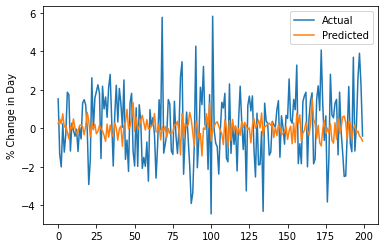

Num instances where predicted to go up and actually went up: 56
Num instances where predicted to go down and actually went down: 37
Num instances where predicted to go down and actually went up: 53
Num instances where predicted to go up and actually went down: 54
Proportion of instances where predicted correctly: 0.465
Proportion of instances where prediction was too low (would rather be >50%): 0.540


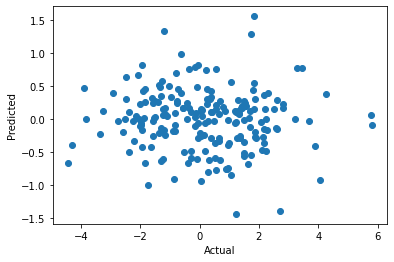

In [133]:
# @title Random Forest Regressor

#cross-validation

X = train_df #.drop('Change_AAPL', axis=1)
X = X.drop('Date', axis=1)
X = X.drop('tech', axis=1)
# X = X.drop('positive', axis=1)
y = train_df['tech']

model_full = RandomForestRegressor()
scores = cross_val_score(model_full, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross Validated mean squared error: {np.sqrt(abs(scores.mean())):.3f}")

#testing on last x days
x = int(input("how many days: "))
test = train_df[:x]
train = train_df[x:]

model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train = train #.drop('Change_AAPL', axis=1)
X_train = X_train.drop('Date', axis=1)
# X_train = X_train.drop('positive', axis=1)
X_train = X_train.drop('tech', axis=1)
y_train = train['tech']

model.fit(X_train, y_train)

X_test = test #.drop('Change_AAPL', axis=1)
X_test = X_test.drop('Date', axis=1)
# X_test = X_test.drop('positive', axis=1)
X_test = X_test.drop('tech', axis=1)
y_test = test['tech']
y_pred = model.predict(X_test)

#plotting results
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.ylabel("% Change in Day")
plt.legend()
plt.show()

plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Calculate the proportion of instances where both y_test and y_pred are either greater than zero or less than zero
positive_positive = ((y_test > 0) & (y_pred > 0)).sum() / len(y_test)
negative_negative = ((y_test < 0) & (y_pred < 0)).sum() / len(y_test)

# Print the results
a_positive_p_positive = ((y_test > 0) & (y_pred > 0)).sum()
print(f"Num instances where predicted to go up and actually went up: {a_positive_p_positive:}")
a_negative_p_negative = ((y_test < 0) & (y_pred < 0)).sum()
print(f"Num instances where predicted to go down and actually went down: {a_negative_p_negative:}")
a_positive_p_negative = ((y_test > 0) & (y_pred < 0)).sum()
print(f"Num instances where predicted to go down and actually went up: {a_positive_p_negative:}")
a_negative_p_positive = ((y_test < 0) & (y_pred > 0)).sum()
print(f"Num instances where predicted to go up and actually went down: {a_negative_p_positive:}")
predicted_correctly = positive_positive + negative_negative
# Print the results
print(f"Proportion of instances where predicted correctly: {predicted_correctly:.3f}")
undershot = (y_test - y_pred > 0).sum()
overshot = (y_test - y_pred < 0).sum()
print(f"Proportion of instances where prediction was too low (would rather be >50%): {undershot / (undershot + overshot):.3f}")

In [134]:
pvt = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
pvt["positive"] = (pvt["y_pred"] > 0) * 1 
pvt["bankroll_movement"] = ((pvt["y_test"] * pvt["positive"]) / 100) + 1

pvt.head(10)

,y_pred,y_test,positive,bankroll_movement
5,0.249634,1.527502,1,1.015275
6,0.483007,-1.330665,1,0.986693
8,0.235301,-2.004502,1,0.979955
10,0.754610,0.231613,1,1.002316
12,0.064321,-1.238282,1,0.987617
13,0.110960,-0.301409,1,0.996986
14,-0.188286,1.871762,0,1.000000
16,-0.547044,1.739579,0,1.000000
17,0.086483,-1.182583,1,0.988174
19,-0.032798,0.265942,0,1.000000


Overall revenue change: 106.94%


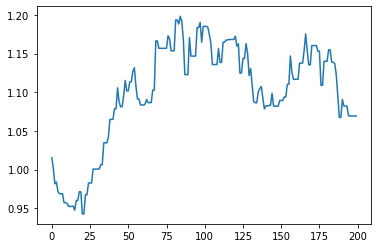

In [135]:
revenue_changes = pvt["bankroll_movement"].tolist()
var = 1
revenue_changes
bankroll = []

for i in range(len(revenue_changes)):
  var *= revenue_changes[i]
  bankroll.append(var)
plt.plot(bankroll, label='bankroll')

print(f"Overall revenue change: {var *100:.2f}%")

In [136]:
nasdaq = pd.read_csv("nasdaq.csv")
nasdaq['date'] = pd.to_datetime(nasdaq['date'], errors='coerce').dt.strftime('%m/%d/%Y') #.date
nasdaq

,date,_NDXD-open,_NDXD-high,_NDXD-low,_NDXD-close,_NDXD-vol
0,01/31/1985,125.00,125.00,125.00,125.00,0
1,02/01/1985,124.63,124.63,124.63,124.63,0
2,02/04/1985,126.22,126.22,126.22,126.22,0
3,02/05/1985,126.76,126.76,126.76,126.76,0
4,02/06/1985,127.16,127.16,127.16,127.16,0
...,...,...,...,...,...,...
9600,03/07/2023,12303.19,12344.04,12130.01,12152.17,542282
9601,03/08/2023,12181.06,12237.72,12102.28,12215.33,508597
9602,03/09/2023,12230.84,12340.45,11970.34,11995.88,506179
9603,03/10/2023,12001.70,12069.62,11789.86,11830.28,619350


In [137]:
testNew = dfPrices[0:x][["Date"]]
testNew["y_pred"] = y_pred
testNew

,Date,y_pred
0,"Mar 14, 2023",0.249634
5,"Mar 10, 2023",0.483007
6,"Mar 09, 2023",0.235301
8,"Mar 08, 2023",0.754610
10,"Mar 07, 2023",0.064321
...,...,...
256,"May 31, 2022",-0.231036
258,"May 27, 2022",-0.144911
259,"May 26, 2022",-0.406188
260,"May 25, 2022",-0.487569


In [138]:
# convert day to date
# test['date'] = pd.to_datetime(test["Date"].dt.strftime('%b %d, %Y'))
testNew['date'] = pd.to_datetime(testNew['Date'], errors='coerce').dt.strftime('%m/%d/%Y') #.date
# test['dateNew'] = test['DATE'].dt.strftime('%m/%d/%Y')
testNew["date"]

0      03/14/2023
5      03/10/2023
6      03/09/2023
8      03/08/2023
10     03/07/2023
          ...    
256    05/31/2022
258    05/27/2022
259    05/26/2022
260    05/25/2022
261    05/24/2022
Name: date, Length: 200, dtype: object

In [139]:
testProcess = testNew[["y_pred", "date"]]
testProcess

,y_pred,date
0,0.249634,03/14/2023
5,0.483007,03/10/2023
6,0.235301,03/09/2023
8,0.754610,03/08/2023
10,0.064321,03/07/2023
...,...,...
256,-0.231036,05/31/2022
258,-0.144911,05/27/2022
259,-0.406188,05/26/2022
260,-0.487569,05/25/2022


In [140]:
combo = testProcess.merge(nasdaq, on="date")
combo["Profit"] = (combo["_NDXD-close"] - combo["_NDXD-open"]) / combo["_NDXD-open"]
combo

,y_pred,date,_NDXD-open,_NDXD-high,_NDXD-low,_NDXD-close,_NDXD-vol,Profit
0,0.483007,03/10/2023,12001.70,12069.62,11789.86,11830.28,619350,-0.014283
1,0.235301,03/09/2023,12230.84,12340.45,11970.34,11995.88,506179,-0.019210
2,0.754610,03/08/2023,12181.06,12237.72,12102.28,12215.33,508597,0.002813
3,0.064321,03/07/2023,12303.19,12344.04,12130.01,12152.17,542282,-0.012275
4,0.110960,03/06/2023,12344.65,12466.88,12297.57,12302.48,498288,-0.003416
...,...,...,...,...,...,...,...,...
194,-0.231036,05/31/2022,12688.95,12762.84,12482.32,12642.10,602894,-0.003692
195,-0.144911,05/27/2022,12421.80,12682.58,12405.29,12681.42,477453,0.020900
196,-0.406188,05/26/2022,11906.83,12337.73,11901.87,12276.79,465147,0.031071
197,-0.487569,05/25/2022,11732.45,12028.89,11714.27,11943.93,450092,0.018025


1.1710516586486


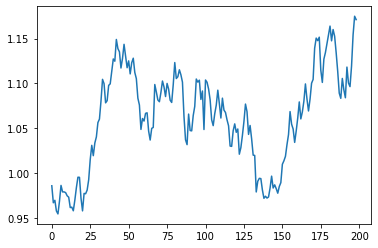

In [141]:
col = combo["Profit"]
start = 1
bank = []
for i in col:
  start *= (1 + i)
  bank.append(start)

plt.plot(bank, label='bankroll')
print(start)

**Retraining**

In [79]:
train_df

,tech,Change_AAPL,Change_AMZN,Change_GOOG,Change_META,Change_MSFT,Change_NVDA,Change_PYPL,Change_TSLA,Change_GLNCY,...,Change_TM,Change_BYDDF,Change_VWAGY,Change_MBGYY,Change_STLA,Change_GM,Change_RACE,Change_F,Change_HMC,Date
5,1.527502,-1.138406,-2.093450,-1.610811,-0.828683,-0.991716,-1.896706,-3.305241,-0.964997,-0.798580,...,-0.883621,-3.018868,-0.704607,-0.409207,-1.565996,-3.129973,-1.708244,-2.654867,-0.830816,"Mar 10, 2023"
6,-1.330665,-1.934097,-1.526473,-1.936713,-2.500671,-1.368149,-3.056877,-1.338358,-4.066574,-0.889680,...,-1.184192,-0.546448,-0.745871,-0.660905,-1.480263,-4.301619,-1.294052,-4.377880,-1.382144,"Mar 09, 2023"
8,-2.004502,0.039264,0.341880,0.264831,1.148357,-0.133837,2.954826,0.904737,-1.642888,1.148410,...,0.157717,1.056082,-0.892388,0.101112,0.054054,0.151134,0.405853,1.564945,0.113122,"Mar 08, 2023"
10,0.231613,-1.366298,-0.542207,-1.309998,-2.375661,-0.838861,-1.322034,-2.129605,-1.917651,-3.424658,...,-1.557191,-0.889047,-1.826722,-1.987084,-1.915913,-1.193436,-1.780361,-0.850077,-1.234568,"Mar 07, 2023"
12,-1.238282,0.026009,-1.512764,1.292921,-1.648936,0.171587,-1.410573,-0.207954,-2.382391,-0.578035,...,0.014274,0.419287,1.052632,-0.099108,-0.955921,-1.389566,-1.148080,-0.764526,-0.374532,"Mar 06, 2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0.102637,-0.470085,-0.442646,0.433227,-0.441441,0.364545,-1.537230,1.113892,-2.792413,2.014099,...,-0.336996,0.898204,0.000000,-0.100959,-0.455373,-1.254246,-0.473115,-0.961538,-0.722456,"May 18, 2018"
1723,-0.354734,-0.531915,0.075921,-0.111132,0.591198,-0.599421,0.666450,2.009532,-0.472193,0.754717,...,-0.240876,-0.589102,-0.297767,0.453172,-0.045065,0.869107,0.134781,0.526316,0.000000,"May 17, 2018"
1725,-0.235303,1.117799,0.608519,0.408391,-0.272183,-0.215694,0.819672,0.412903,0.951374,0.952381,...,0.306726,0.434783,-0.249128,0.304260,0.768883,2.867190,0.284730,1.694915,0.332930,"May 16, 2018"
1727,0.521373,-0.171343,-0.730571,-0.990826,-0.302899,0.082271,-2.863924,-0.077071,-0.263158,0.492611,...,-0.161243,-1.004304,0.348259,0.304260,0.000000,1.483516,-0.097000,1.081081,-0.575061,"May 15, 2018"


In [126]:
# @title Random Forest Regressor

#testing on last x days
# x = int(input("how many days: "))
x = 200
retrainGUIDE = 25
test = train_df[:x]
train = train_df[x:]

# train = train.drop('positive', axis=1)
# train = train.drop('tech', axis=1)

# test = test.drop('positive', axis=1)
# test = test.drop('tech', axis=1)

y_pred = []
y_test = test["tech"]

# retrain every 10 days
for i in range(0,int(x/retrainGUIDE)):
  model = RandomForestRegressor(n_estimators=100, random_state=42)

  X_train = train #.drop('Change_AAPL', axis=1)
  X_train = X_train.drop('Date', axis=1)
  X_train = X_train.drop('tech', axis=1)
  y_train = train['tech']
  print(len(y_train))

  model.fit(X_train, y_train)

  X_test = test.copy() #.drop('Change_AAPL', axis=1)
  # y_test = test['tech']

  # item = (test.iloc[-1]).to_frame().T

  item = test.iloc[-retrainGUIDE:]
  item = item.drop('Date', axis=1)
  # X_test = X_test.drop('positive', axis=1)
  item = item.drop('tech', axis=1)
  # print((item))

  # y_pred.append(model.predict(item)[0])
  predictions = model.predict(item)
  # print(len(predictions))
  for im in predictions:
    y_pred.append(im)

  # print(item)

  # simply concatenate both dataframes
  # train = pd.concat([(test.iloc[-1]).to_frame().T, train])#.reset_index(drop = True)
  train = pd.concat([test.iloc[-retrainGUIDE:], train])
  test = test[0:-retrainGUIDE]
  # df.head(5)

#plotting results
# plt.plot(y_test.values, label='Actual')
# plt.plot(y_pred, label='Predicted')
# plt.ylabel("% Change in Day")
# plt.legend()
# plt.show()

# plt.scatter(y_test,y_pred)
# plt.xlabel("Actual")
# plt.ylabel("Predicted")
# test
# item
len(y_pred)

1014
1039
1064
1089
1114
1139
1164
1189


200

In [127]:
pvt = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
pvt["positive"] = (pvt["y_pred"] > 0) * 1 
pvt["bankroll_movement"] = ((pvt["y_test"] * pvt["positive"]) / 100) + 1
pvt

,y_pred,y_test,positive,bankroll_movement
5,-0.284756,1.527502,0,1.000000
6,0.011678,-1.330665,1,0.986693
8,-0.254148,-2.004502,0,1.000000
10,0.229527,0.231613,1,1.002316
12,-0.618718,-1.238282,0,1.000000
...,...,...,...,...
258,0.654199,0.135924,1,1.001359
259,0.213448,2.593622,1,1.025936
260,0.120069,3.898783,1,1.038988
261,0.091465,2.234616,1,1.022346


Overall revenue change: 123.98%


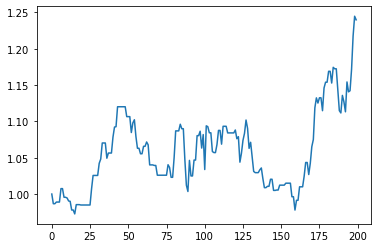

In [128]:

revenue_changes = pvt["bankroll_movement"].tolist()
var = 1
revenue_changes
bankroll = []

for i in range(len(revenue_changes)):
  var *= revenue_changes[i]
  bankroll.append(var)
plt.plot(bankroll, label='bankroll')

print(f"Overall revenue change: {var *100:.2f}%")

In [129]:
testNew = dfPrices[0:x][["Date"]]
testNew["y_pred"] = y_pred
testNew

,Date,y_pred
0,"Mar 14, 2023",-0.284756
5,"Mar 10, 2023",0.011678
6,"Mar 09, 2023",-0.254148
8,"Mar 08, 2023",0.229527
10,"Mar 07, 2023",-0.618718
...,...,...
256,"May 31, 2022",0.654199
258,"May 27, 2022",0.213448
259,"May 26, 2022",0.120069
260,"May 25, 2022",0.091465


In [130]:
testNew['date'] = pd.to_datetime(testNew['Date'], errors='coerce').dt.strftime('%m/%d/%Y')
testProcess = testNew[["y_pred", "date"]]
testProcess

,y_pred,date
0,-0.284756,03/14/2023
5,0.011678,03/10/2023
6,-0.254148,03/09/2023
8,0.229527,03/08/2023
10,-0.618718,03/07/2023
...,...,...
256,0.654199,05/31/2022
258,0.213448,05/27/2022
259,0.120069,05/26/2022
260,0.091465,05/25/2022


In [131]:
combo = testProcess.merge(nasdaq, on="date")
combo["Profit"] = (combo["_NDXD-close"] - combo["_NDXD-open"]) / combo["_NDXD-open"]
combo

,y_pred,date,_NDXD-open,_NDXD-high,_NDXD-low,_NDXD-close,_NDXD-vol,Profit
0,0.011678,03/10/2023,12001.70,12069.62,11789.86,11830.28,619350,-0.014283
1,-0.254148,03/09/2023,12230.84,12340.45,11970.34,11995.88,506179,-0.019210
2,0.229527,03/08/2023,12181.06,12237.72,12102.28,12215.33,508597,0.002813
3,-0.618718,03/07/2023,12303.19,12344.04,12130.01,12152.17,542282,-0.012275
4,-0.769714,03/06/2023,12344.65,12466.88,12297.57,12302.48,498288,-0.003416
...,...,...,...,...,...,...,...,...
194,0.654199,05/31/2022,12688.95,12762.84,12482.32,12642.10,602894,-0.003692
195,0.213448,05/27/2022,12421.80,12682.58,12405.29,12681.42,477453,0.020900
196,0.120069,05/26/2022,11906.83,12337.73,11901.87,12276.79,465147,0.031071
197,0.091465,05/25/2022,11732.45,12028.89,11714.27,11943.93,450092,0.018025


1.1710516586486


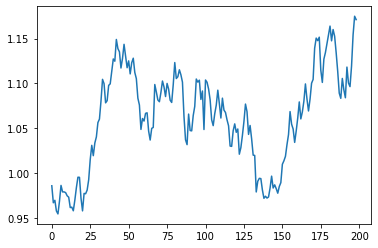

In [132]:
col = combo["Profit"]
start = 1
bank = []
for i in col:
  start *= (1 + i)
  bank.append(start)

plt.plot(bank, label='bankroll')
print(start)

# Industry


In [ ]:
dfPrices = dfPrices.drop("tech", axis=1)
dfPrices

In [ ]:

miningCompanies = ["GLNCY", "BHP", "RIO", "VALE", "CSUAY", "NGLOY", "ZIJMF"]

mktcaps = [59.63, 150.26, 171.78, 73.11, 626.85, 44.64, 356.80]

sumT = 0
for i in mktcaps:
  sumT+=i
for i in range(0,len(mktcaps)):
  mktcaps[i]/=sumT
mktcaps

In [ ]:
dfPrices["mining"] = (mktcaps[0]* dfPrices["Change_"+miningCompanies[0]])

for i in range(1,len(miningCompanies)):
  dfPrices["mining"] += (mktcaps[1]* dfPrices["Change_"+miningCompanies[i]])

dfPrices["mining"] 

In [ ]:
#y_pred


In [ ]:
testNew = dfPrices[0:x][["Date"]]
testNew["y_pred"] = y_pred
testNew['date'] = pd.to_datetime(testNew['Date'], errors='coerce').dt.strftime('%m/%d/%Y')
testProcess = testNew[["y_pred", "date"]]
testProcess

In [ ]:
miningIndex = pd.read_csv("miningIndex.csv")
miningIndex['date'] = pd.to_datetime(miningIndex['date'], errors='coerce').dt.strftime('%m/%d/%Y') #.date
miningIndex

In [ ]:
combo = testProcess.merge(miningIndex, on="date")
combo["Profit"] = (combo["_5SP151040-close"] - combo["_5SP151040-open"]) / combo["_5SP151040-open"]
combo

In [ ]:
col = combo["Profit"]
start = 1
bank = []
for i in col:
  start *= (1 + i)
  bank.append(start)

plt.plot(bank, label='bankroll')
print(start)